Filename: \\wsl$\Ubuntu-22.04\home\hdw\data\XMM\Mrk359\0830550801\SPECTRA\GUEST16479573\0830550801\pps\mcmc_chain_2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  CHAIN         1 BinTableHDU     81   10000R x 10C   ['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D']   
None
ColDefs(
    name = 'nH__1'; format = 'D'; unit = '10^22'
    name = 'Gamma__4'; format = 'D'
    name = 'kT_e__5'; format = 'D'; unit = 'keV'
    name = 'norm__9'; format = 'D'
    name = 'Sigma__11'; format = 'D'; unit = 'keV'
    name = 'norm__13'; format = 'D'
    name = 'te__14'; format = 'D'
    name = 'tau__15'; format = 'D'
    name = 'norm__17'; format = 'D'
    name = 'FIT_STATISTIC'; format = 'D'; unit = 'Chi-Squared'
)


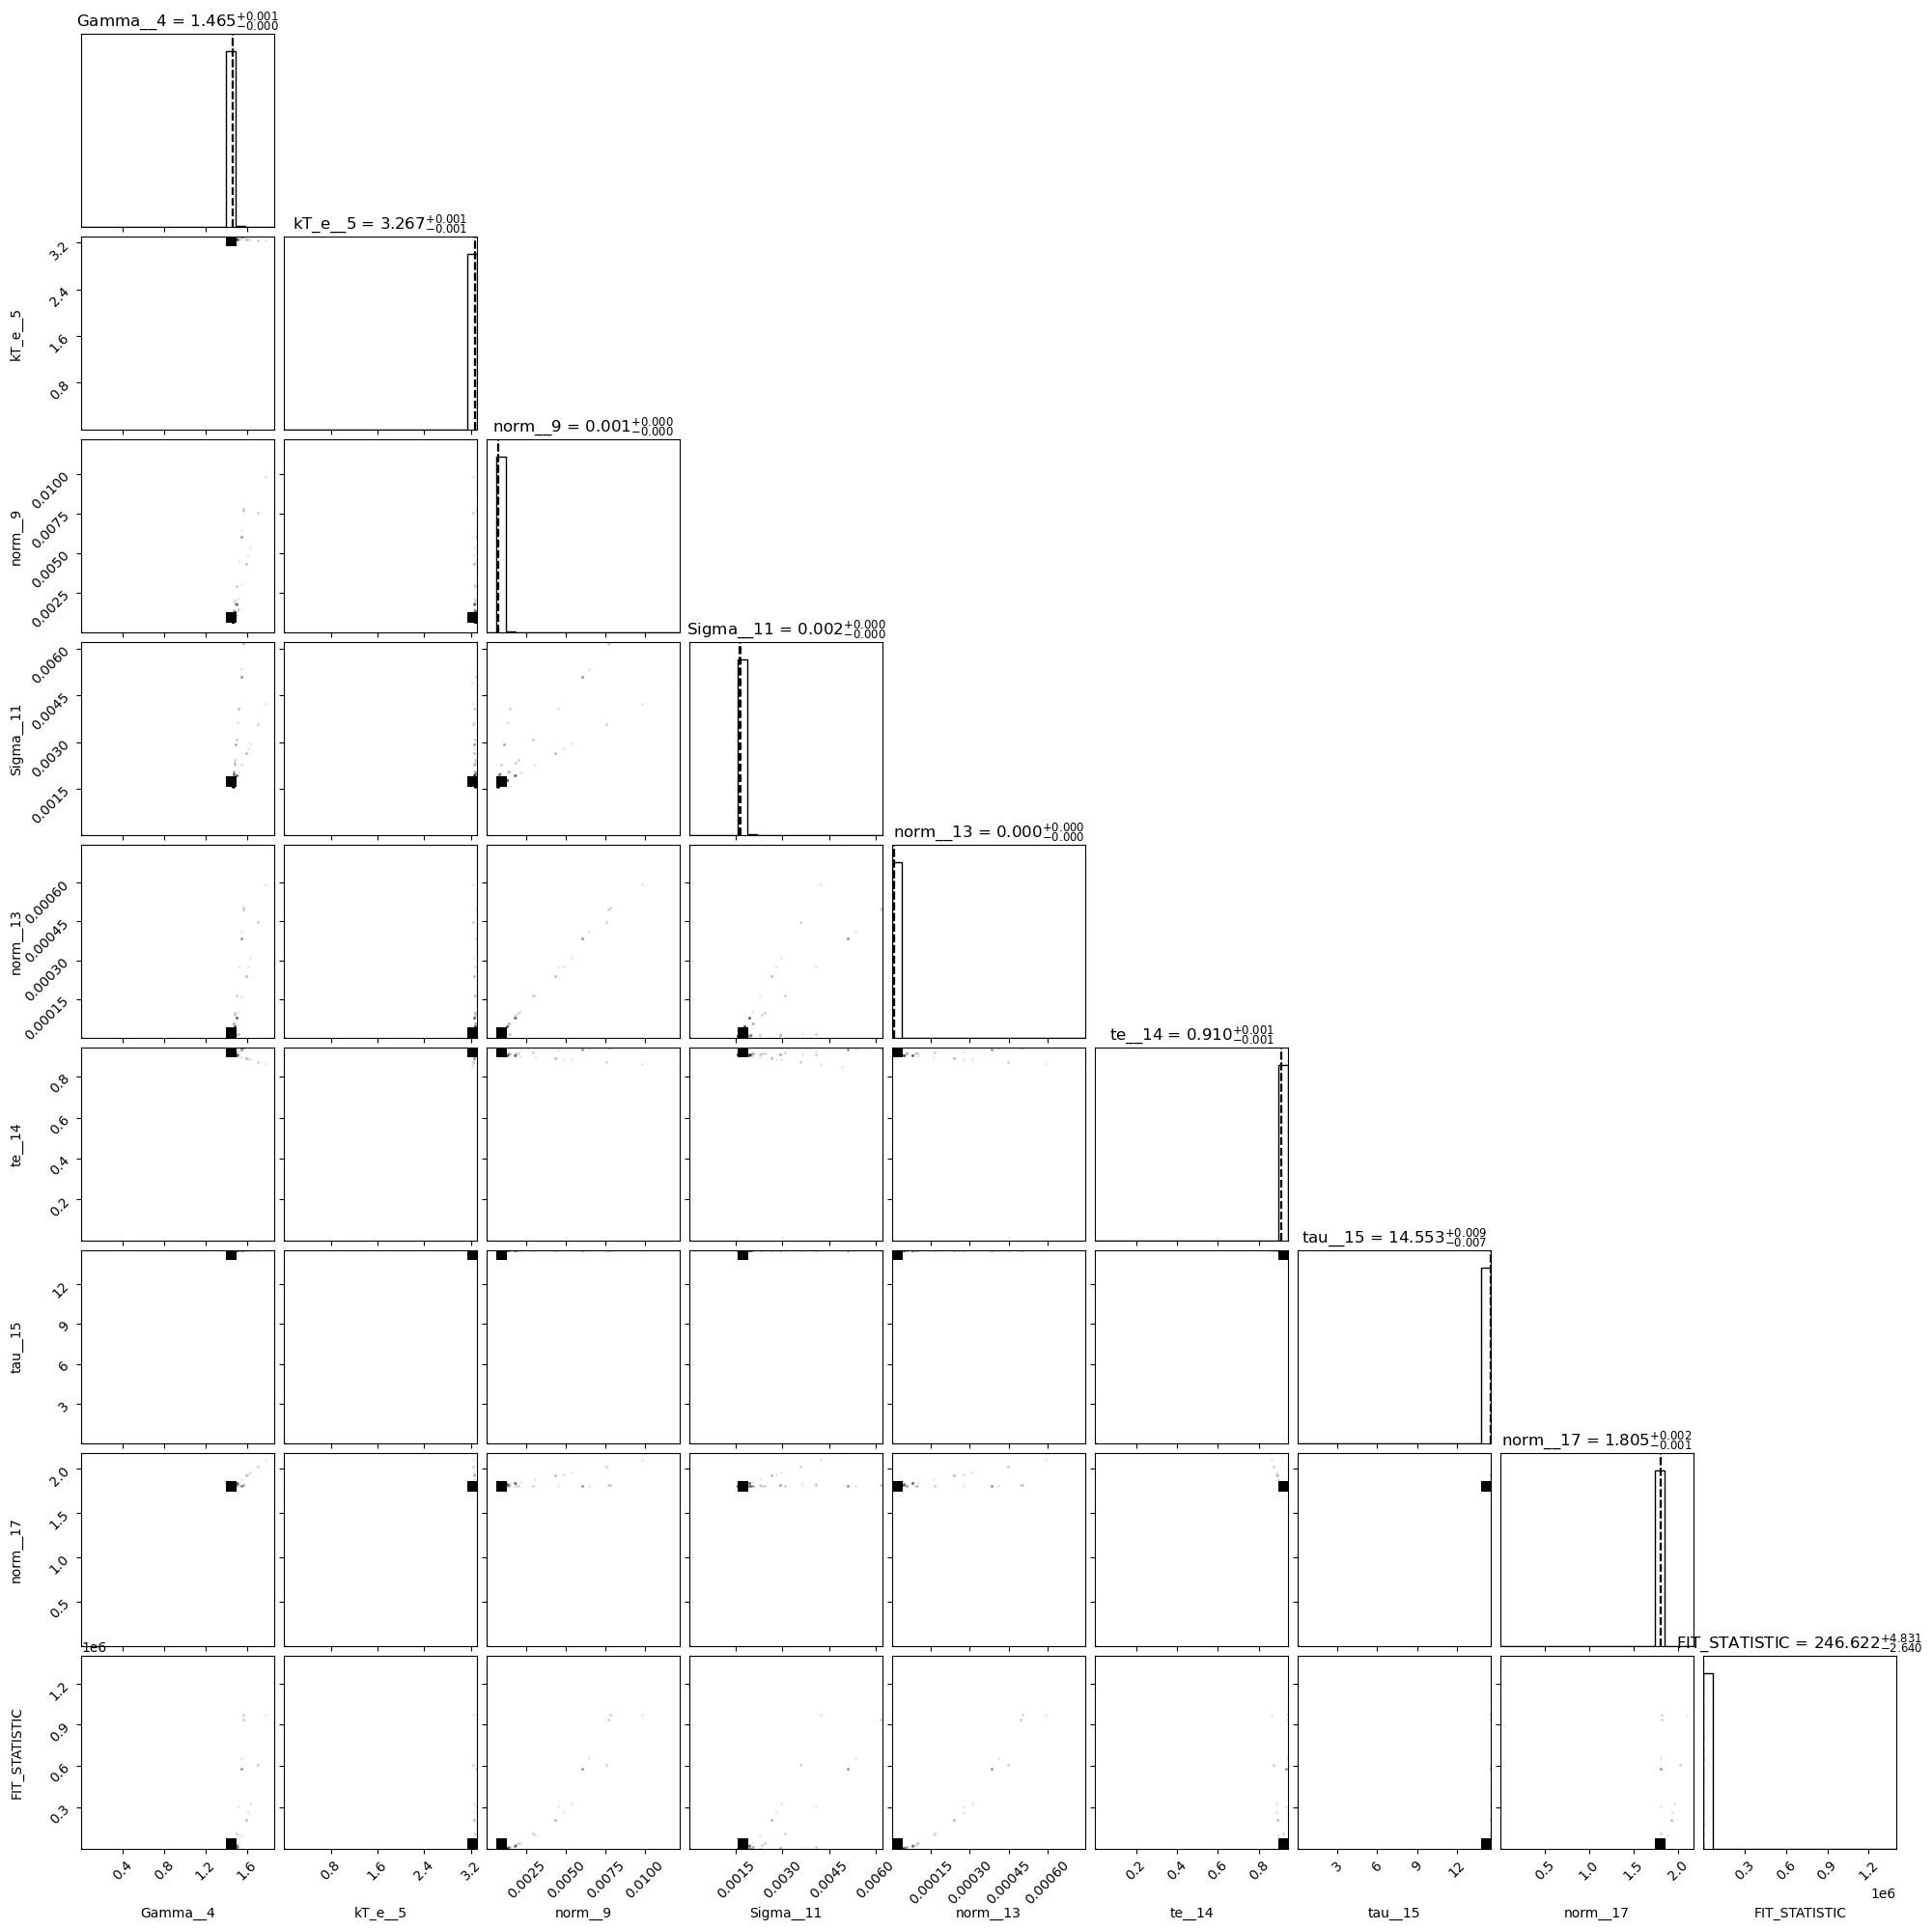

In [7]:
import numpy as np
import corner
from astropy.io import fits
import matplotlib.pyplot as plt

# WSL 中的 MCMC chain 文件路径
chain_file = r"\\wsl$\Ubuntu-22.04\home\hdw\data\XMM\Mrk359\0830550801\SPECTRA\GUEST16479573\0830550801\pps\mcmc_chain_2.fits"

# 读取 FITS 文件
with fits.open(chain_file) as hdul:
    chain_data = hdul[1].data  # 获取 MCMC 数据
    chain_data = hdul[1].data  # MCMC 数据
    param_names = hdul[1].columns.names  # 读取参数名
    print(hdul.info())  # 查看文件结构
    print(hdul[1].columns)  # 查看参数名称

# 提取所有自由参数
# 去掉 'STAT' 列，只保留物理参数
param_names = param_names[1:]
params = np.vstack([chain_data.field(name) for name in param_names]).T

# 画 Corner 图
fig = corner.corner(params, labels=param_names, show_titles=True, quantiles=[0.16, 0.5, 0.84], title_fmt=".3f")

plt.show()

# 显示图像
plt.show()
